<a href="https://colab.research.google.com/github/KawulJanSetouchi/QuantumML/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions


array([[ 0.03570294, -0.24110982,  0.26708665, -0.72599787,  0.04975739,
        -0.00763799, -0.265316  , -0.08408782,  0.24039826, -0.1311769 ]],
      dtype=float32)

In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
loss_fn(y_train[:1], predictions).numpy()

2.2579439

In [7]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2922 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1448 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1085 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0893 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0763 - accuracy: 0.9761


In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0754 - accuracy: 0.9756 - 713ms/epoch - 2ms/step


[0.07543448358774185, 0.975600004196167]

In [10]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [11]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.2343069e-07, 4.5505931e-08, 3.0132683e-06, 5.3145413e-05,
        1.8858382e-10, 2.4956998e-07, 4.8691346e-13, 9.9994183e-01,
        2.0730280e-08, 1.6298579e-06],
       [8.3902103e-07, 3.1280000e-04, 9.9967551e-01, 1.0891846e-05,
        1.2434621e-14, 3.0009527e-08, 2.4559114e-08, 7.3816838e-12,
        5.1348696e-08, 3.5622643e-16],
       [1.6447945e-06, 9.9831319e-01, 1.9523907e-04, 7.8811150e-05,
        7.9073861e-06, 2.2046229e-06, 6.2225213e-06, 9.4493915e-04,
        4.4862609e-04, 1.2019684e-06],
       [9.9997342e-01, 2.0010165e-11, 1.8070166e-05, 6.4927635e-10,
        4.1264320e-07, 1.8269034e-07, 6.9818211e-06, 1.3183914e-07,
        3.6724511e-08, 7.9338525e-07],
       [2.9191458e-06, 1.1302900e-09, 3.4124919e-06, 2.3591031e-09,
        9.9902034e-01, 6.9319333e-07, 4.9548817e-06, 2.7104374e-05,
        5.3345593e-07, 9.4006158e-04]], dtype=float32)>

In [12]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

TensorFlow version: 2.15.0


In [13]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [14]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [15]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [16]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [17]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [18]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [19]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [20]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.13336250185966492, Accuracy: 96.02166748046875, Test Loss: 0.06362004578113556, Test Accuracy: 97.8699951171875
Epoch 2, Loss: 0.03964564576745033, Accuracy: 98.72999572753906, Test Loss: 0.04997026547789574, Test Accuracy: 98.3699951171875
Epoch 3, Loss: 0.02058156207203865, Accuracy: 99.32333374023438, Test Loss: 0.050800781697034836, Test Accuracy: 98.50999450683594
Epoch 4, Loss: 0.012633582577109337, Accuracy: 99.57833099365234, Test Loss: 0.05263388901948929, Test Accuracy: 98.41999816894531
Epoch 5, Loss: 0.008133125491440296, Accuracy: 99.73833465576172, Test Loss: 0.059640202671289444, Test Accuracy: 98.43000030517578


In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [22]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
train_images.shape

(60000, 28, 28)

In [26]:
len(train_labels)

60000

In [27]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
test_images.shape

(10000, 28, 28)

In [29]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

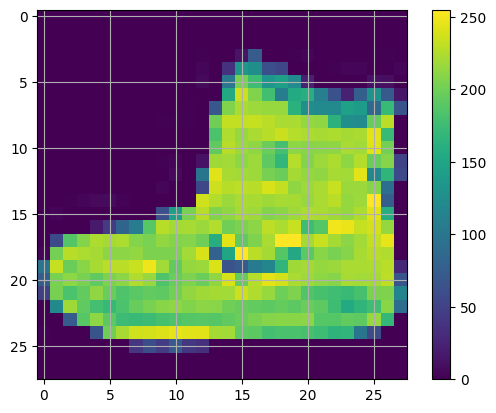

In [31]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [32]:
train_images = train_images / 255.0

test_images = test_images / 255.0

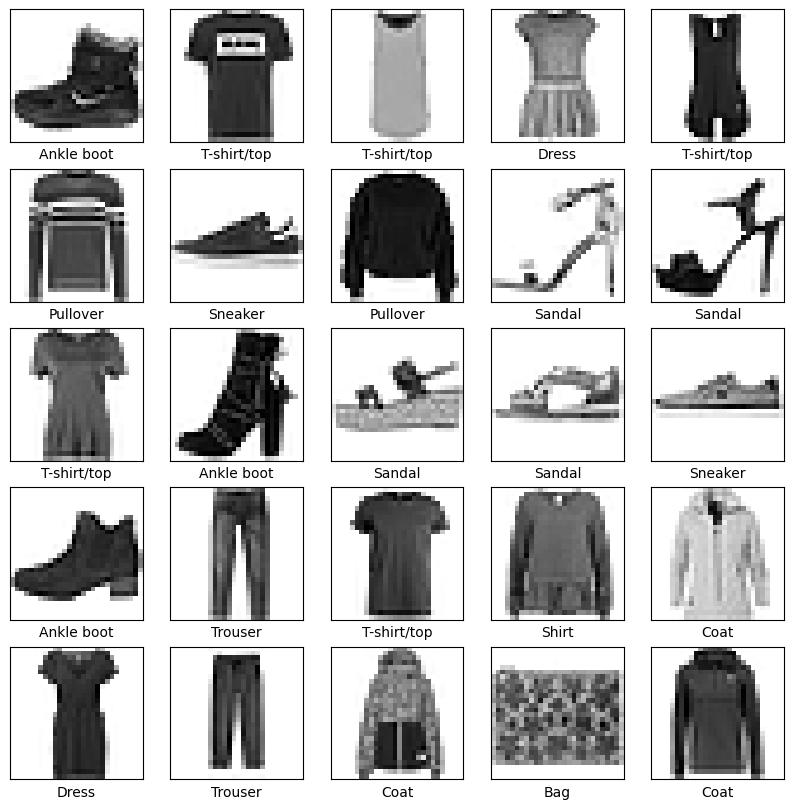

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5023 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3771 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3386 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3119 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2947 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2793 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2651 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2557 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2470 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.23

In [38]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3262 - accuracy: 0.8861 - 663ms/epoch - 2ms/step

Test accuracy: 0.8860999941825867


In [39]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [40]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [41]:
predictions[0]

array([2.9351581e-08, 4.3734794e-09, 9.1196050e-08, 1.8304919e-10,
       6.2384631e-09, 3.6021267e-04, 8.4532957e-07, 8.7196538e-03,
       1.9565634e-06, 9.9091709e-01], dtype=float32)

In [42]:
np.argmax(predictions[0])

9

In [43]:
test_labels[0]

9

In [44]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

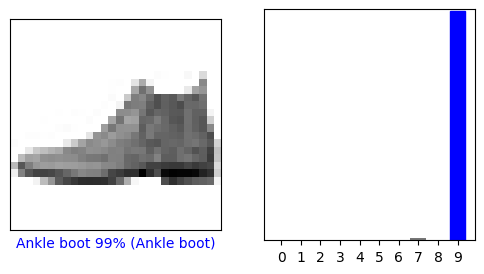

In [45]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

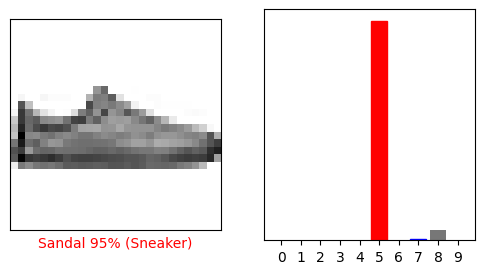

In [46]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

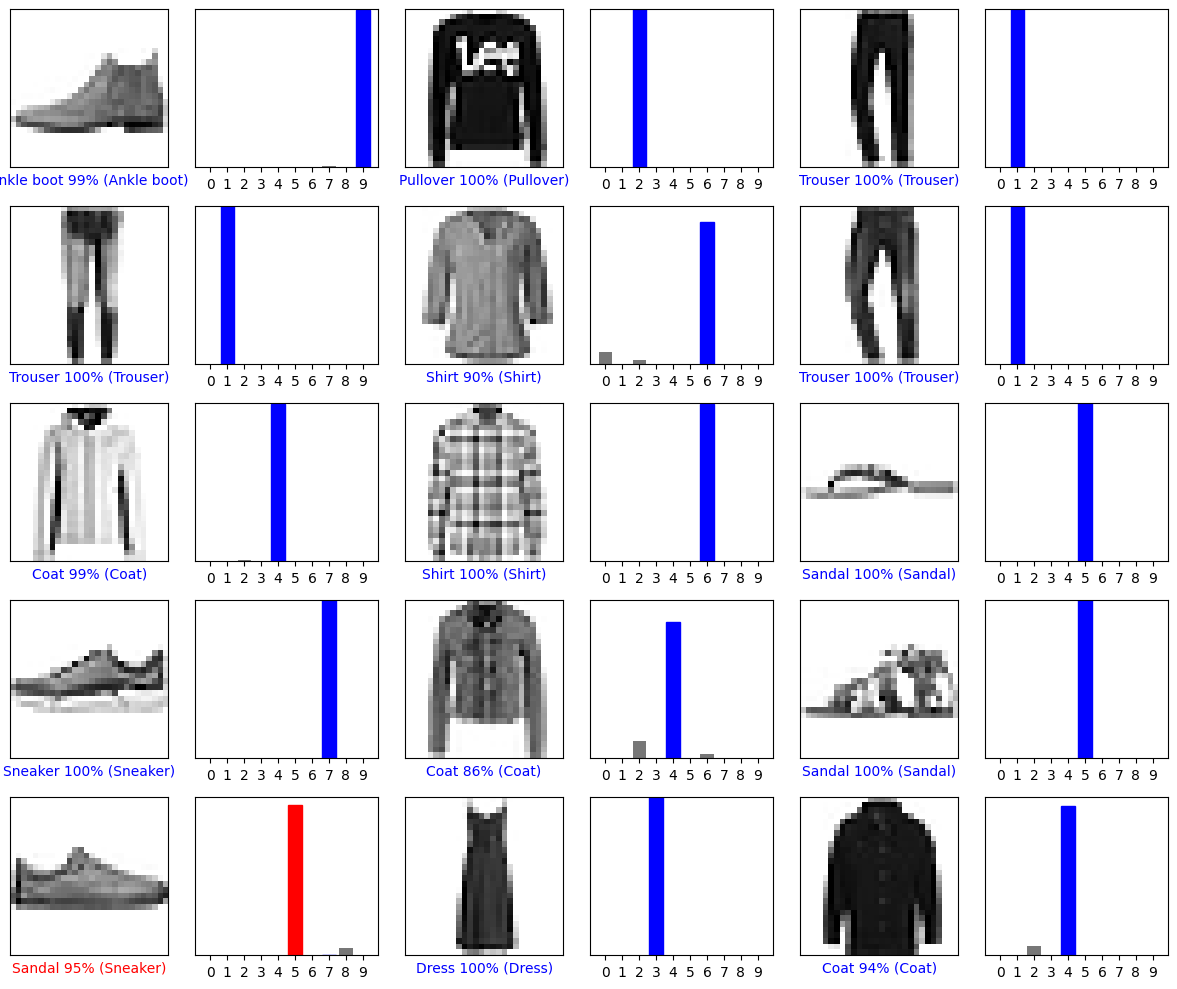

In [47]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [48]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [49]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [51]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[4.44097941e-06 7.59994389e-13 9.99461114e-01 3.90666180e-11
  2.50699377e-04 1.01752184e-13 2.83775502e-04 8.56429444e-21
  2.75664322e-12 1.54367784e-13]]


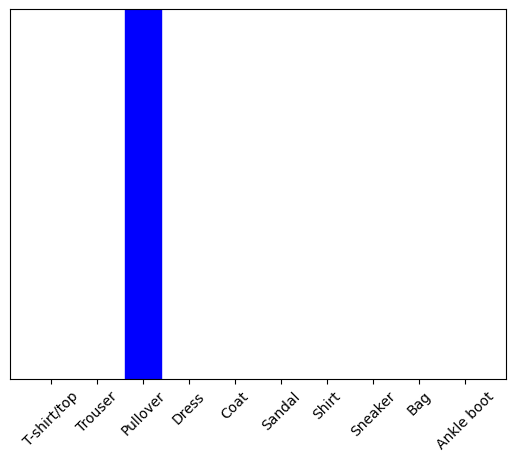

In [52]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [53]:
np.argmax(predictions_single[0])

2